# Исследование успешности игр из интернет-магазина

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В этом исследовании представлены аналитические подходы, определяющие закономерности успешности игр на рынке .

### Изучение общей информации. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки для дальнейшего построения диаграмм
import seaborn as sns # и барплоты пригодятся
import numpy as np # пригодится для округления
from scipy import stats as st # для проверки гипотез и др.

data = pd.read_csv('/datasets/games.csv') # читаем csv файл
display(data.head(15)) # изучаем основную информацию в данных
data.info() # основная информация о датафрейме

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


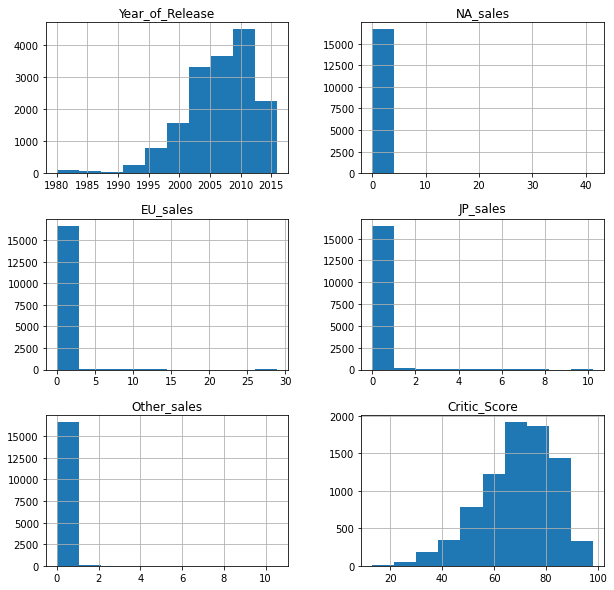

In [2]:
data.hist(figsize=(10, 10)) # информация о датафрейме в виде гистограмм по всем столбцам
plt.show()

Изучив информацию о датафрейме обнаружены многочисленные пропуски в данных по ряду столбцов. Первоначальная гистограмма ряда показателей оказалась относительно информативной (critic_score и year_release) с отображением основного массива значений ретингов критиков и годов выпуска игр, но пока по ним выводов делать не стоит, так как данные еще не предобработаны.

### Предобработка данных.

*Замена названий столбцов*

In [3]:
data.columns = map(str.lower, data.columns)

*Преобразование данных*

Столбцы для потенциальной замены формата данных и округления для упрощения восприятия: 'year_of_release'. Также стоит преобразовать в float64 столбец 'user_score', так как возможно предстоят вычисления.

In [4]:
# столбцы с числовыми значениями для перевода в целочисленные
data['year_of_release'] = data['year_of_release'].astype('Int64')

# Увидел что в столбце 'user_score' есть ячейки 'tbd' - очевидно что это не выставленный результат по каким-то причинам
# заменим эти ячейки на пропуски и переведем данные в float64 (так как остальный значения в float64 формате)
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float64')

Предварительно преобразовал столбцы с годом и оценкой пользователей в целочисленные. Столбцы с продажами преобразованию лучше не подвергать, так как данные в миллионах.

In [5]:
# проверим изменения
display(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сработало!

*Обработка пропусков*

In [6]:
print(data.isna().sum()) # количество пропущенных значений для каждого столбца

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [7]:
data = data.dropna(subset = ['year_of_release']) # 269 значений можно убрать - это около 1,6% от всего массива
data = data.dropna(subset = ['name']) # 2 значения - можно убрать (не окажет существенного влияния на весь массив)
data = data.dropna(subset = ['genre']) # 2 значения - можно убрать (не окажет существенного влияния на весь массив)

In [8]:
data['rating'] = data['rating'].replace(np.nan,'unknown') # удалять данные не стоит - их около 40%. Заменим пока строчным значением, так как остальные также строчные. 

В настоящий момент не вижу методов для специфического заполнения столбцов с оценками критиков и пользователей, так как это может существенно исказить дальнейший анализ (данных практически 50%). Предварительно оставляю как есть.

Среди причин пропусков стоит выделить случайный технические причины, автоматическое заполнение (год выпуска), отсутствие оценки критиков и пользователей по причине малой известности игр (или специфического жанра). 

Ячейки 'tbd' в 'user_score' возможно представляют собой аббревиатуру to be defined или to be determined - что позволяет выставить рейтинг в последствии.

In [9]:
print(data.isna().sum()) # cмотрим что получилось

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


Оставили пропуски в оценках, так как их много. Остальные пропуски устранены.

*Подсчет количества дубликатов*

In [10]:
print(data.duplicated().sum())

0


*Оценка неявных дубликатов*

In [11]:
print(data['genre'].unique()) # взглянем нет ли одинаковых жанров с разными названиями в этих играх

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Предварительно явных и неявных дубликатов не обнаружено.

*Рассчет суммарных продаж во всех регионах*

In [12]:
data['sales_summary'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # просто сложим столбцы
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_summary
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Предврительная предобработка данных завершена: данные переведены в необходимый формат, округлены для лучшего восприятия, устранены некоторые пропуски, ряд пропусков ('tbd' и пропущенные значения user_score) - оставлены (tbd - переводен в формат пропусков NaN) для сохранения массива данных, также создан новый столбец с общим количеством продаж, можно приступать к исследовательскому анализу данных.

###  Исследовательский анализ данных.

*Количество игр, выпущенных в различный период и оценка значимости года выпуска*

Text(0, 0.5, 'Количество выпущенных игр')

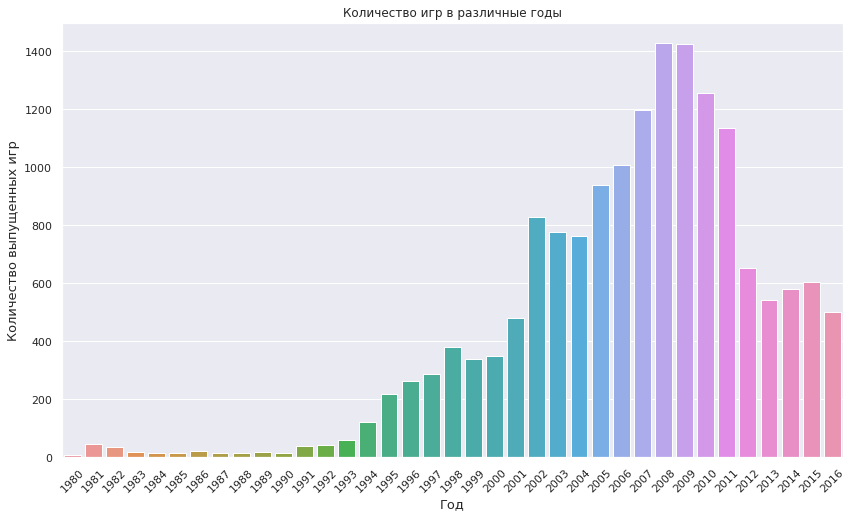

In [13]:
games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index() # сводная таблица: наиболее простой метод

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(14,8)}) # увеличим размер
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='year_of_release', y='name', data = games_years) # барплот
plt.title("Количество игр в различные годы") # назовем барплот
plt.xlabel('Год', size=13) # назовем оси
plt.ylabel('Количество выпущенных игр', size=13) # назовем оси

Из гистограммы видно, что основной процесс выпуска игр начала в середине 90ых годов, что очевидно связаны с повсеместным появлением стационарных компьютеров у пользователей. Некоторый спад производства отмечен после 2010 года, что вероятно связано с предпочтениями пользователей в отношении мобильных устройств в качестве платформы для игры.

*Динамика продаж по платформам и сроки появления новых платформ*

Определим платформы с наибольшими суммарными продажами.

Text(0, 0.5, 'Суммарные продажи')

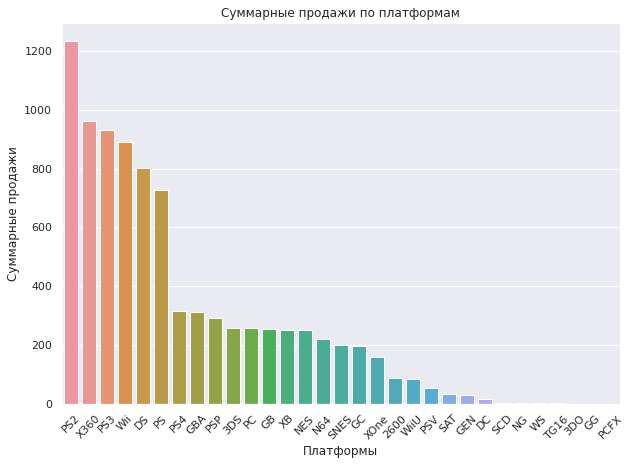

In [14]:
platforms_sales = data.pivot_table(index='platform', values='sales_summary', aggfunc='sum').sort_values(by='sales_summary', ascending=False).reset_index()

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(10,7)}) # увеличим размер
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='platform', y='sales_summary', data = platforms_sales) # барплот
plt.title('Суммарные продажи по платформам') # назовем барплот
plt.xlabel('Платформы') # назовем оси
plt.ylabel('Суммарные продажи') # назовем оси

Очевидно наибольшие суммарные продажи по платформам: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'

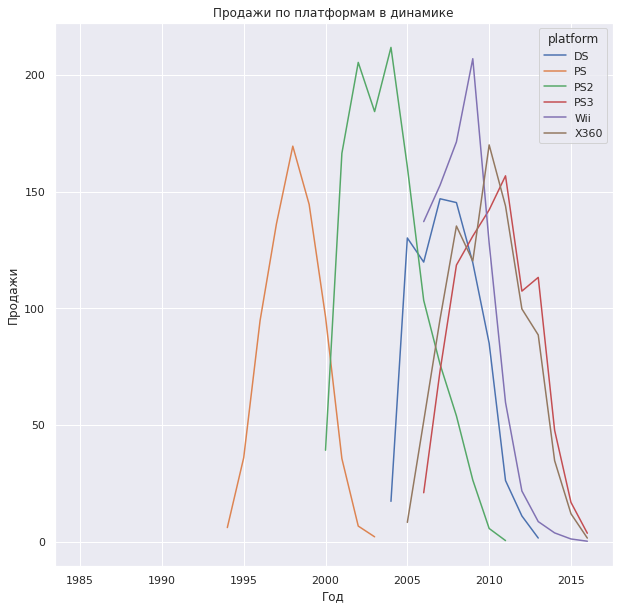

In [15]:
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] # список платформ с максимальными продажами из предыдущего барплота
selected_df = data.query('platform in @selected_platforms') # сделаем датафрейм с этими платформами

selected_platforms = pd.pivot_table(selected_df, index='year_of_release', columns='platform', values='sales_summary', aggfunc='sum') # сделаем сводную таблицу для дальнейшего графика
selected_platforms.plot(grid=True, figsize = (10,10))
plt.title('Продажи по платформам в динамике')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

*Анализ по актуальному периоду*

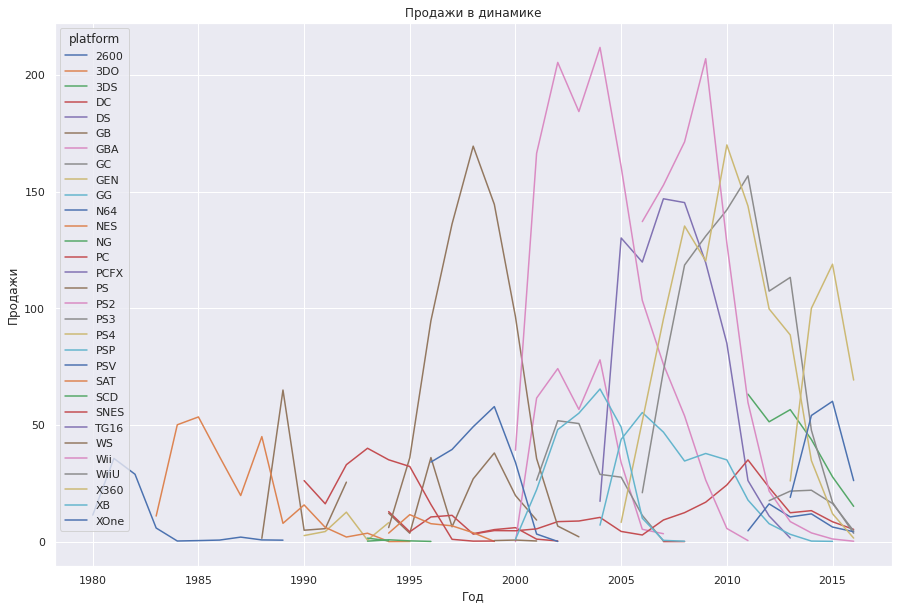

In [16]:
# построем график со всеми платформами для определения актуального периода
relevant_period = pd.pivot_table(data, index='year_of_release', columns='platform', values='sales_summary', aggfunc='sum') # сделаем сводную таблицу для дальнейшего графика
relevant_period.plot(grid=True, figsize = (15,10))
plt.title('Продажи в динамике')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Несмотря на множество платформ на графике видно, что по отдельным платформам последние старты продаж начались в 2011 - 2013 годах. Также на предыдущей гистограмме было видно, что количество выпущенных игр после 2011-2012 года, находится на сравнительно схожем уровне, в связи с чем для начала актуального периода целесообразно было бы взять 2011 год.

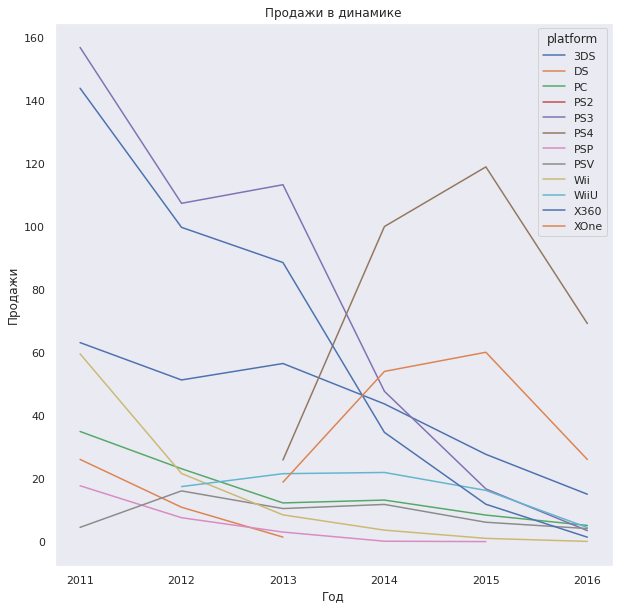

In [17]:
data_relevant_period = data.query('year_of_release >= 2011') # смотрим только актуальный период с 2011 года по настоящее время
data_relevant_period_table = pd.pivot_table(data_relevant_period, index='year_of_release', columns='platform', values='sales_summary', aggfunc='sum') # сделаем сводную таблицу для дальнейшего графика
data_relevant_period_table.plot(grid=False, figsize = (10,10))
plt.title('Продажи в динамике')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Стоит отметить, что неизвестно, все ли данные за 2016 год представлены в датасете. В связи с этим исходя из графика наибольший рост продаж отмечается по алтформам: PS4, XOne (лидируют по продажам, растут на момент 2015 года). Спад продаж отмечается по платформам: DS, PC, PS2, PS3, PSP, PSV, Wii, WiU, X360.
Потенциально прибыльными можно считать PS4 и XOne.

Text(0, 0.5, 'Продажи')

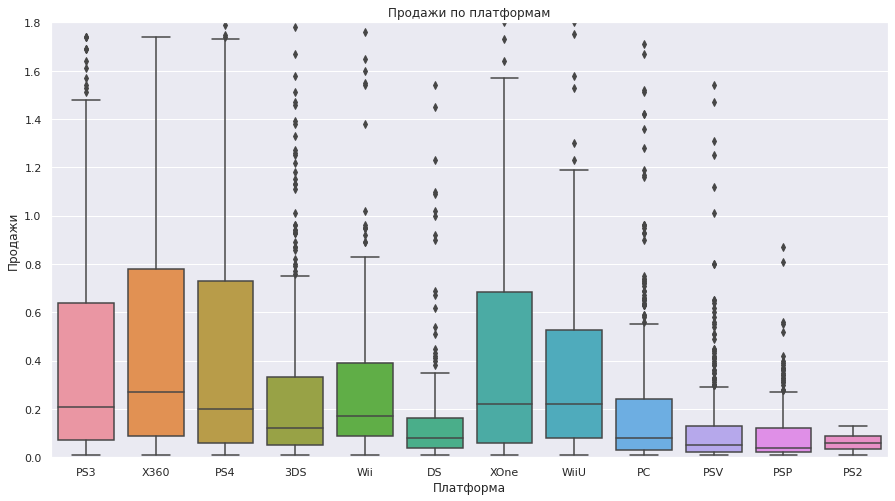

In [18]:
plt.figure(figsize=(15, 8)) # сделаем пообъемнее
sns.boxplot(x = 'platform', y = 'sales_summary', data = data_relevant_period) # ящики с усами 
plt.ylim(0, 1.8) # ограничение по оси Y для адекватного восприятия графика
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')

In [19]:
data_relevant_period.groupby('platform')['sales_summary'].describe() # обратимся к числовым значениям

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.12,0.3325,14.60
DS,184.0,0.210489,0.636579,0.01,0.0375,0.08,0.1625,8.06
PC,389.0,0.251105,0.505710,0.01,0.0300,0.08,0.2400,5.14
PS2,7.0,0.064286,0.042762,0.01,0.0350,0.06,0.0900,0.13
PS3,708.0,0.629336,1.451388,0.01,0.0700,0.21,0.6400,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,312.0,0.092981,0.116731,0.01,0.0200,0.04,0.1200,0.87
PSV,429.0,0.125431,0.212341,0.01,0.0200,0.05,0.1300,1.96
Wii,197.0,0.482335,1.059069,0.01,0.0900,0.17,0.3900,10.12


За выделенный актуальный период максимальный продажи отмечены у PS3, X360, 3DS, PS4. При этом наибольший средний уровень продаж у PS4 - 0,83 млн. Однако наибольшее медианное значение у X360 и WiiU. Также на диаграмме виден существенный разброс данных (как по квартилям, так и большое количество выбросов).

*Влияние отзывов пользователей и критиков на продажи*

Учитывая популярность, высокий средний уровень продаж - целесообразно провести анализ на примере PS4.

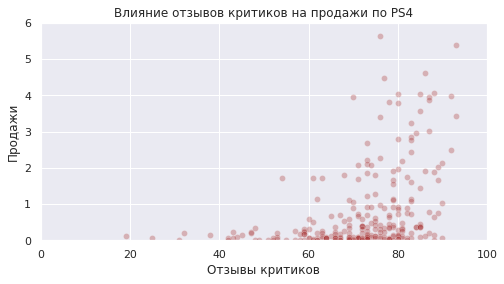

Коэффициент корреляции: 0.40656790206178095


In [20]:
ps4_data_analysis = data_relevant_period[data_relevant_period['platform']=='PS4'] # отбираем только одну платформу PS4

plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='sales_summary', data = ps4_data_analysis, alpha=.3, color = 'brown') # диаграмма рассеяния
plt.title('Влияние отзывов критиков на продажи по PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.ylim(0, 6)
plt.xlim(0, 100)
plt.show()

print('Коэффициент корреляции:', ps4_data_analysis['critic_score'].corr(ps4_data_analysis['sales_summary']))

Корреляция между отзывами критиков и продажами PS4 умеренная. Определенная положительная связь между показателями присутствует.

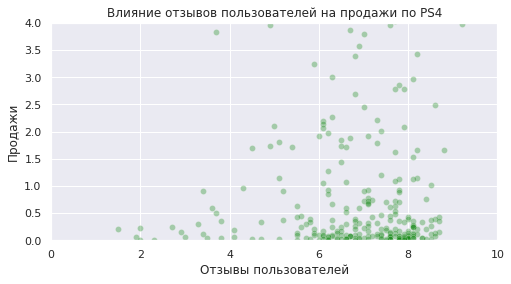

Коэффициент корреляции: -0.031957110204556376


In [21]:
ps4_data_analysis = data_relevant_period[data_relevant_period['platform']=='PS4'] # отбираем только одну платформу PS4

plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='sales_summary', data = ps4_data_analysis, alpha=.3, color = 'green') # диаграмма рассеяния
plt.title('Влияние отзывов пользователей на продажи по PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.ylim(0, 4)
plt.xlim(0, 10)
plt.show()

print('Коэффициент корреляции:', ps4_data_analysis['user_score'].corr(ps4_data_analysis['sales_summary']))

Корреляция между отзывами пользователей и продажами PS4 практически отсутствует, что видно на графике и по числовым данным коэффициента корреляции.

*Взаимосвязи отзывов критиков и пользователей с продажами на других платформах (PS3, XOne, X360)*

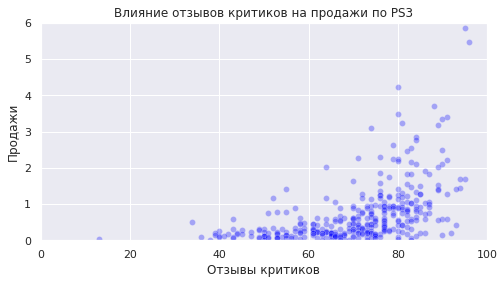

Коэффициент корреляции: 0.38011114718290767


In [22]:
ps3_data_analysis = data_relevant_period[data_relevant_period['platform']=='PS3'] # отбираем только одну платформу PS3

plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='sales_summary', data = ps3_data_analysis, alpha=.3, color = 'blue') # диаграмма рассеяния
plt.title('Влияние отзывов критиков на продажи по PS3')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.ylim(0, 6)
plt.xlim(0, 100)
plt.show()

print('Коэффициент корреляции:', ps3_data_analysis['critic_score'].corr(ps3_data_analysis['sales_summary']))

Корреляция между отзывами критиков и продажами PS4 умеренная. Определенная положительная связь между показателями присутствует.

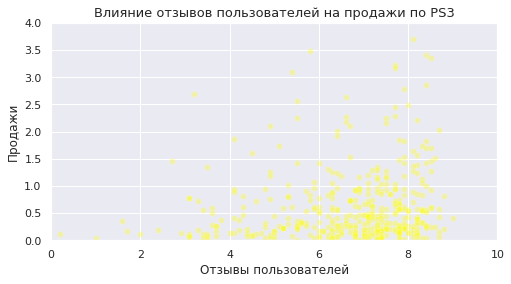

Коэффициент корреляции: 0.014089348308019396


In [23]:
ps3_data_analysis = data_relevant_period[data_relevant_period['platform']=='PS3'] # отбираем только одну платформу PS3

plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='sales_summary', data = ps3_data_analysis, alpha=.3, color = 'yellow') # диаграмма рассеяния
plt.title('Влияние отзывов пользователей на продажи по PS3', size=13)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.ylim(0, 4)
plt.xlim(0, 10)
plt.show()

print('Коэффициент корреляции:', ps3_data_analysis['user_score'].corr(ps3_data_analysis['sales_summary']))

Корреляция между отзывами пользователей и продажами PS3 практически отсутствует, что видно на графике и по числовым данным коэффициента корреляции.

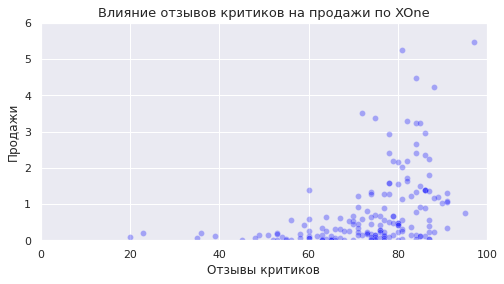

Коэффициент корреляции: 0.4169983280084017


In [24]:
xone_data_analysis = data_relevant_period[data_relevant_period['platform']=='XOne'] # отбираем только одну платформу XOne

plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='sales_summary', data = xone_data_analysis, alpha=.3, color = 'blue') # диаграмма рассеяния
plt.title('Влияние отзывов критиков на продажи по XOne', size=13)
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.ylim(0, 6)
plt.xlim(0, 100)
plt.show()

print('Коэффициент корреляции:', xone_data_analysis['critic_score'].corr(xone_data_analysis['sales_summary']))

Корреляция между отзывами критиков и продажами XOne умеренная. Определенная положительная связь между показателями присутствует.

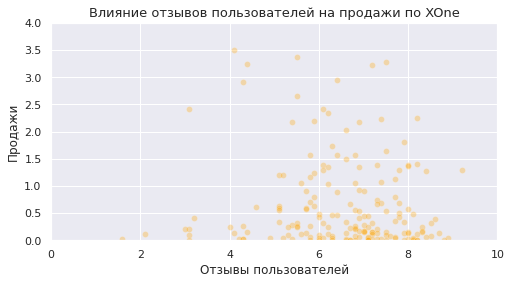

Коэффициент корреляции: -0.06892505328279414


In [25]:
xone_data_analysis = data_relevant_period[data_relevant_period['platform']=='XOne'] # отбираем только одну платформу XOne

plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='sales_summary', data = xone_data_analysis, alpha=.3, color = 'orange') # диаграмма рассеяния
plt.title('Влияние отзывов пользователей на продажи по XOne', size=13)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.ylim(0, 4)
plt.xlim(0, 10)
plt.show()

print('Коэффициент корреляции:', xone_data_analysis['user_score'].corr(xone_data_analysis['sales_summary']))

Корреляция между отзывами пользователей и продажами XOne практически отсутствует, что видно на графике и по числовым данным коэффициента корреляции.

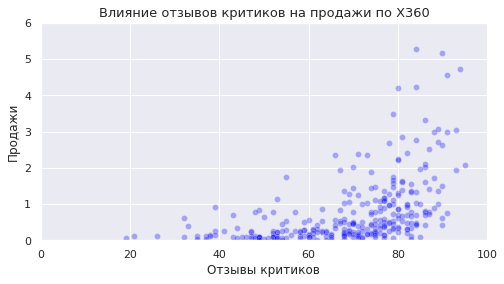

Коэффициент корреляции: 0.3912533245484558


In [26]:
x360_data_analysis = data_relevant_period[data_relevant_period['platform']=='X360'] # отбираем только одну платформу X360

plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='sales_summary', data = x360_data_analysis, alpha=.3, color = 'blue') # диаграмма рассеяния
plt.title('Влияние отзывов критиков на продажи по X360', size=13)
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.ylim(0, 6)
plt.xlim(0, 100)
plt.show()

print('Коэффициент корреляции:', x360_data_analysis['critic_score'].corr(x360_data_analysis['sales_summary']))

Корреляция между отзывами критиков и продажами XOne умеренная. Определенная положительная связь между показателями присутствует.

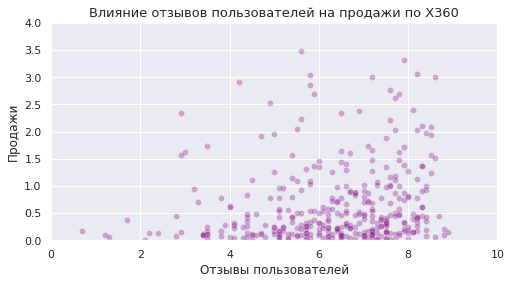

Коэффициент корреляции: 0.03891817072910255


In [27]:
x360_data_analysis = data_relevant_period[data_relevant_period['platform']=='X360'] # отбираем только одну платформу X360

plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='sales_summary', data = x360_data_analysis, alpha=.3, color = 'purple') # диаграмма рассеяния
plt.title('Влияние отзывов пользователей на продажи по X360', size=13)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.ylim(0, 4)
plt.xlim(0, 10)
plt.show()

print('Коэффициент корреляции:', x360_data_analysis['user_score'].corr(x360_data_analysis['sales_summary']))

Корреляция между отзывами пользователей и продажами X360 практически отсутствует, что видно на графике и по числовым данным коэффициента корреляции.

Таким образом можно сделать промежуточный вывод о том, что имеется связь между продажами игр на различных платформах и отзывами критиков. При этом отзывы пользователей практически не оказывают влияния на уровень продаж.

*Продажи игр в зависимости от жанров*

Рассмотрим медианы продаж за весь 35 летний период 

Text(0, 0.5, 'Медиана продаж')

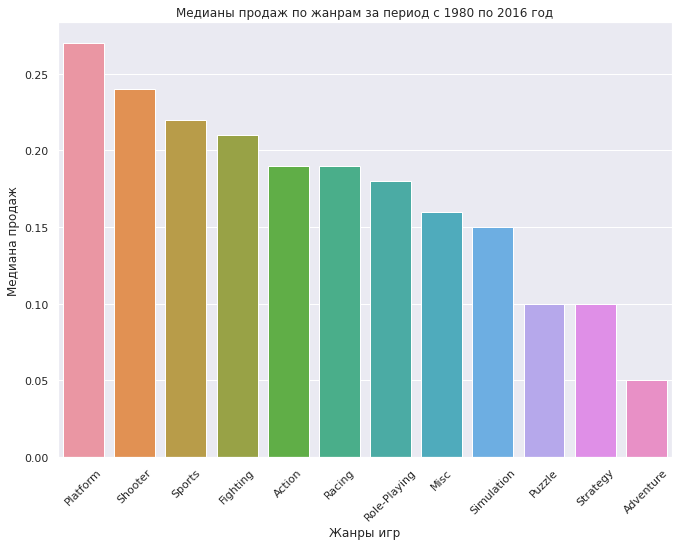

In [28]:
genres_sales = data.pivot_table(index='genre', values='sales_summary', aggfunc=['median']).reset_index() # cводная таблица по медианам продаж
genres_sales.columns = ['genre', 'median'] # переименуем
genres_sales = genres_sales.sort_values(by='median', ascending=False) # сортировка
# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(11,8)}) # увеличим размер
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='genre', y='median', data = genres_sales) # барплот
plt.title('Медианы продаж по жанрам за период с 1980 по 2016 год')
plt.xlabel('Жанры игр')
plt.ylabel('Медиана продаж')

Теперь рассмотрим медианы продаж за актуальный период

Text(0, 0.5, 'Медианы продаж')

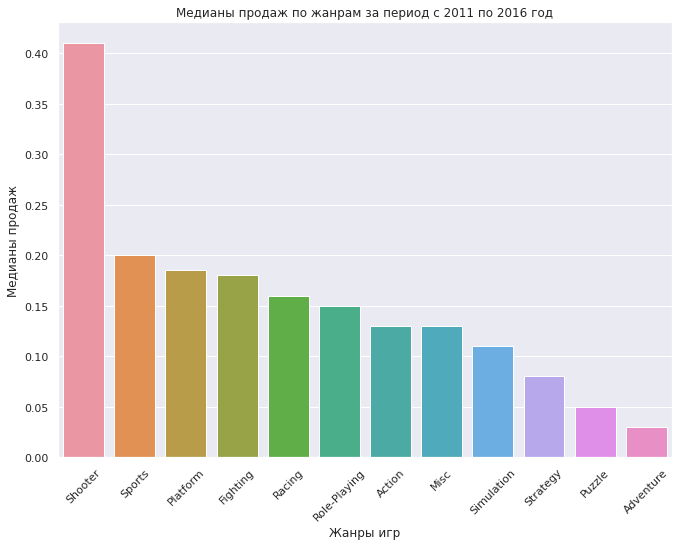

In [29]:
genres_sales_relevant = data_relevant_period.pivot_table(index='genre', values='sales_summary', aggfunc=['median']).reset_index() # cводная таблица по медианам продаж
genres_sales_relevant.columns = ['genre', 'median'] # переименуем
genres_sales_relevant = genres_sales_relevant.sort_values(by='median', ascending=False) # сортировка
# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(11,8)}) # увеличим размер
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='genre', y='median', data = genres_sales_relevant) # барплот
plt.title('Медианы продаж по жанрам за период с 2011 по 2016 год')
plt.xlabel('Жанры игр')
plt.ylabel('Медианы продаж')

На данных графиках видно, что c 1980 по 2016 уровень продаж у игр в жанре Platform и шутерам, которые очевидно были очень популярны до 00ых годов. В последние годы отмечается все больший интерес к шутерам и спортивным симуляторам, в то время как интерес к платформерам несколько меньше по сравнению со всем периодом с 1980 по 2016 г. Среди жанров с низкими продажами в периоде с 1980 по 2016 г и в актуальный период - приключения, стратегии и паззлы.

### Портрет пользователей по каждому региону.

*Портрет пользователей в Северной Америке*

,platform,na_sales,percentage
0,X360,226.80,33.37%
1,PS3,168.26,24.76%
2,PS4,108.74,16.00%
3,XOne,93.12,13.70%
4,3DS,82.65,12.16%


Text(0, 0.5, 'Продажи')

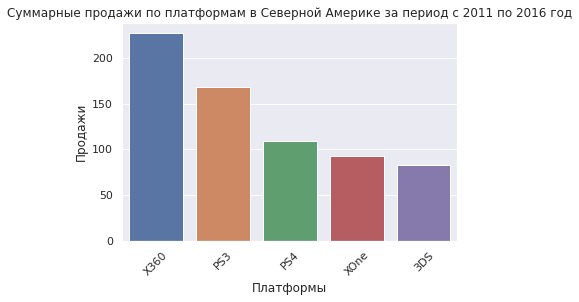

In [30]:
na_platform_sales = data_relevant_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)

na_part_df = na_platform_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 платформам в Северной Америке
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 платформам, а не от всех платформ, так как мы исследуем топ-5)
na_part_df['percentage'] = na_part_df['na_sales'] / na_part_df['na_sales'].sum() # cчитаем долю продаж по каждой из 5 платформ в Северной Америке от общего показателя продаж по топ-5 платформам
na_part_df['percentage'] = na_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(na_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='platform', y='na_sales', data = na_platform_sales) # барплот
plt.title('Суммарные продажи по платформам в Северной Америке за период с 2011 по 2016 год')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

В Северной Америке за весь период с 1980 по 2016 год наиболее успешными по продажам игр платформами являются X360 и PS3. При этом их суммарная доля среди топ-5 платформ по продажам игр более 50%: 33% и 24%, соответственно. 

,genre,na_sales,percentage
0,Action,230.92,33.59%
1,Shooter,194.43,28.28%
2,Sports,108.70,15.81%
3,Role-Playing,83.78,12.19%
4,Misc,69.69,10.14%


Text(0, 0.5, 'Продажи')

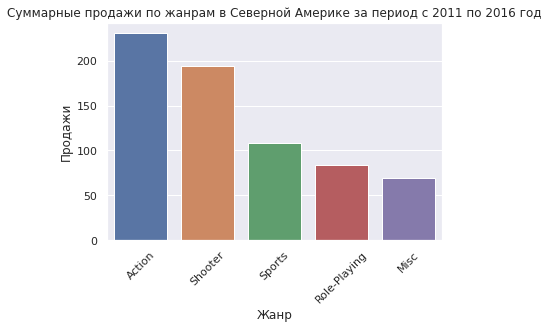

In [31]:
na_genre_sales = data_relevant_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)

na_part_df = na_genre_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 жанрам в Северной Америке
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 жанрам, а не от всех жанров, так как мы исследуем топ-5)
na_part_df['percentage'] = na_part_df['na_sales'] / na_part_df['na_sales'].sum() # cчитаем долю продаж по каждому из 5 жанров в Северной Америке от общего показателя продаж по топ-5 жанрам
na_part_df['percentage'] = na_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(na_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='genre', y='na_sales', data = na_genre_sales) # барплот
plt.title('Суммарные продажи по жанрам в Северной Америке за период с 2011 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

В Северной Америке за весь период с 2011 по 2016 год наиболее продаваемыми жанрами игр являются Action и Shooters. При этом их суммарная доля среди топ-5 жанров по продажам игр составляет более 50%: 33% и 28%, соответственно. 

,rating,na_sales
0,M,308.45
1,E,170.17
2,unknown,123.69
3,E10+,117.72
4,T,109.31
5,EC,0.42
6,RP,0.00


Text(0, 0.5, 'Продажи')

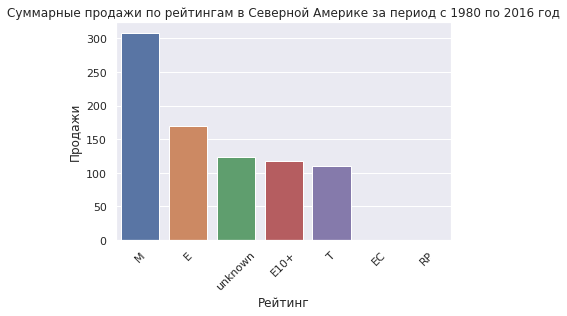

In [32]:
na_rating_sales = data_relevant_period.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()

display(na_rating_sales)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='rating', y='na_sales', data = na_rating_sales) # барплот
plt.title('Суммарные продажи по рейтингам в Северной Америке за период с 1980 по 2016 год')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

В Северной Америке за весь период с 2011 по 2016 год наиболее продаваемыми играми являются игры категории М (для взрослых)

*Портрет пользователя в Европе*

,platform,eu_sales,percentage
0,PS3,163.10,30.25%
1,PS4,141.09,26.16%
2,X360,117.10,21.71%
3,3DS,61.27,11.36%
4,PC,56.70,10.51%


Text(0, 0.5, 'Продажи')

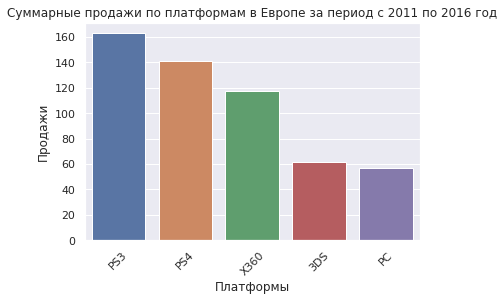

In [33]:
eu_platform_sales = data_relevant_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)

eu_part_df = eu_platform_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 платформам в Европе
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 платформам, а не от всех платформ, так как мы исследуем топ-5)
eu_part_df['percentage'] = eu_part_df['eu_sales'] / eu_part_df['eu_sales'].sum() # cчитаем долю продаж по каждой из 5 платформ в Европе от общего показателя продаж по топ-5 платформам
eu_part_df['percentage'] = eu_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(eu_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='platform', y='eu_sales', data = eu_platform_sales) # барплот
plt.title('Суммарные продажи по платформам в Европе за период с 2011 по 2016 год')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

В Европе за весь период с 2011 по 2016 год наиболее успешными по продажам игр платформами являются PS3 и PS4 При этом их суммарная доля среди топ-5 платформ по продажам игр составляет более 50%: 30% и 26%, соответственно.

,genre,eu_sales,percentage
0,Action,199.12,36.98%
1,Shooter,148.02,27.49%
2,Sports,88.48,16.43%
3,Role-Playing,62.30,11.57%
4,Racing,40.58,7.54%


Text(0, 0.5, 'Продажи')

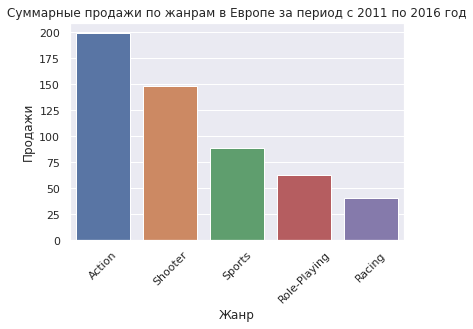

In [34]:
eu_genre_sales = data_relevant_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)

eu_part_df = eu_genre_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 жанрам в Европе
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 жанрам, а не от всех жанров, так как мы исследуем топ-5)
eu_part_df['percentage'] = eu_part_df['eu_sales'] / eu_part_df['eu_sales'].sum() # cчитаем долю продаж по каждому из 5 жанров в Европе от общего показателя продаж по топ-5 жанрам
eu_part_df['percentage'] = eu_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(eu_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='genre', y='eu_sales', data = eu_genre_sales) # барплот
plt.title('Суммарные продажи по жанрам в Европе за период с 2011 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

В Европе за весь период с 1980 по 2016 год наиболее продаваемыми жанрами игр являются Action и Shooter. При этом их суммарная доля среди топ-5 жанров по продажам игр составляет более 60%: 36% и 27%, соответственно.

,rating,eu_sales
0,M,250.26
1,E,141.73
2,unknown,116.61
3,T,83.16
4,E10+,78.00
5,RP,0.03
6,EC,0.00


Text(0, 0.5, 'Продажи')

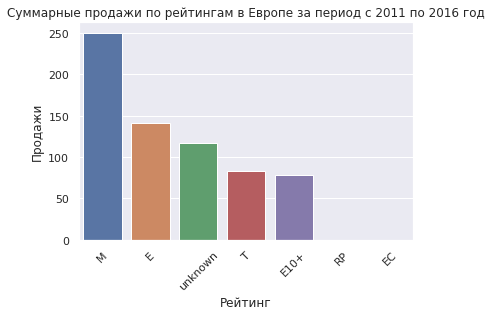

In [35]:
eu_rating_sales = data_relevant_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()

display(eu_rating_sales)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='rating', y='eu_sales', data = eu_rating_sales) # барплот
plt.title('Суммарные продажи по рейтингам в Европе за период с 2011 по 2016 год')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

В Европе за весь период с 2011 по 2016 год также наиболее продаваемыми играми являются игры категории М (для взрослых).

*Портрет пользователя в Японии*

,platform,jp_sales,percentage
0,3DS,100.62,47.50%
1,PS3,49.39,23.31%
2,PSP,24.04,11.35%
3,PSV,21.84,10.31%
4,PS4,15.96,7.53%


Text(0, 0.5, 'Продажи')

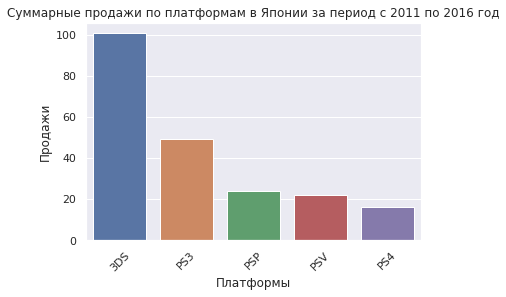

In [36]:
jp_platform_sales = data_relevant_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)

jp_part_df = jp_platform_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 платформам в Японии
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 платформам, а не от всех платформ, так как мы исследуем топ-5)
jp_part_df['percentage'] = jp_part_df['jp_sales'] / jp_part_df['jp_sales'].sum() # cчитаем долю продаж по каждой из 5 платформ в Японии от общего показателя продаж по топ-5 платформам
jp_part_df['percentage'] = jp_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(jp_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='platform', y='jp_sales', data = jp_platform_sales) # барплот
plt.title('Суммарные продажи по платформам в Японии за период с 2011 по 2016 год')
plt.xlabel('Платформы')
plt.ylabel('Продажи')

Ожидаемо наиболее успешной платформой по уровню продаж в Японии за период с 2011 по 2016 год является Nintendo-3DS. Доля среди наиболее успешных топ-5 платформ в продажах игр составляет почти 50%.

,genre,jp_sales,percentage
0,Role-Playing,79.87,43.03%
1,Action,63.62,34.28%
2,Misc,17.60,9.48%
3,Fighting,12.38,6.67%
4,Platform,12.13,6.54%


Text(0, 0.5, 'Продажи')

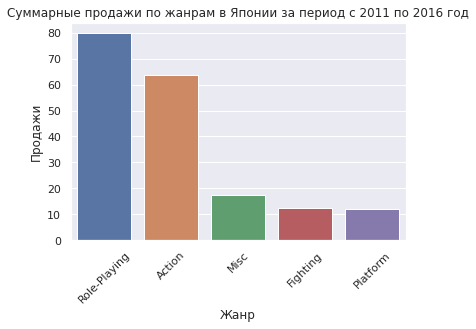

In [37]:
jp_genre_sales = data_relevant_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)

jp_part_df = jp_genre_sales # cделаем мини-датафрейм для определения долей продаж по топ 5 жанрам в Японии
# добавляем столбец (рассчитываю долю именно от показателя продаж по нашим топ-5 жанрам, а не от всех жанров, так как мы исследуем топ-5)
jp_part_df['percentage'] = jp_part_df['jp_sales'] / jp_part_df['jp_sales'].sum() # cчитаем долю продаж по каждому из 5 жанров в Японии от общего показателя продаж по топ-5 жанрам
jp_part_df['percentage'] = jp_part_df['percentage'].map(lambda n: '{:,.2%}'.format(n)) # отобразим в процентах
display(jp_part_df)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='genre', y='jp_sales', data = jp_genre_sales) # барплот
plt.title('Суммарные продажи по жанрам в Японии за период с 2011 по 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Продажи')

В Японии за весь период с 1980 по 2016 год наиболее продаваемым жанром игр является RPG и Action. При этом доля среди топ-5 жанров по продажам игр составляет почти 80%.

,rating,jp_sales
0,unknown,138.21
1,E,36.68
2,T,33.39
3,M,26.14
4,E10+,11.23
5,EC,0.00
6,RP,0.00


Text(0, 0.5, 'Продажи')

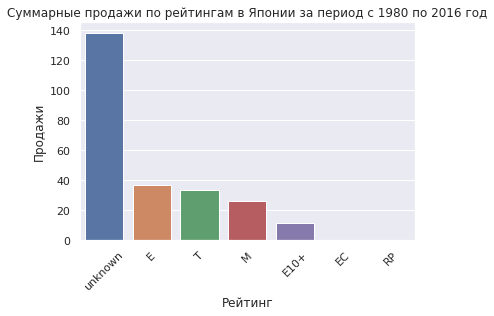

In [38]:
jp_rating_sales = data_relevant_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()

display(jp_rating_sales)

# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(6,4)})
plt.xticks(rotation=45) # развернем подписи
sns.barplot(x='rating', y='jp_sales', data = jp_rating_sales) # барплот
plt.title('Суммарные продажи по рейтингам в Японии за период с 1980 по 2016 год')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')

В Европе за весь период с 1980 по 2016 год также наиболее продаваемыми играми являются игры с неопределенной категорией (unknown). Возможно, потому что организация Entertainment Software Rating Board (ESRB) не определяет рейтинг для некоторых игр для Nintendo(?), однозначно утверждать затруднительно.

Таким образом, за период с период с 2011 по 2016 гг, портрет среднестатистического игрока выглядит следующим образом:

В Северной Америке: пользователь обычно играет на X360 или PS3 в экшены и шутеры категории М по ESRB

В Европе: пользователь обычно играет на PS3 или PS4 в экшены и шутеры категории М по ESRB

В Японии: пользователь обычно играет на Nintedo-3DS в RPG и экшены неизвестной возрастной категории.

Исходя из полученных результатов, представляется что рейтинг (М по ESRB) оказывает влияние на продажи: в частности в Северной Америке и Европе наибольшее количество продаж с этим рейтингом.

### Проверка гипотез.

*1. Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Формулируем нулевую гипотезу (Н_0) и альтернативную (Н_1)


H_0: Пользовательские рейтинги (user_score) платформы Xbox One = Пользовательские рейтинги (user_score) платформы PC (нулевая гипотеза)
H_1: Пользовательские рейтинги (user_score) платформы Xbox One ≠ Пользовательские рейтинги (user_score) платформы PC (альтернативная гипотеза)

In [39]:
xbox_one = data_relevant_period.loc[(data_relevant_period['platform'] == 'XOne'), 'user_score'] # берем в актуальном периоде пользовательские рейтинги по Xone
xbox_one = xbox_one.dropna() # пришлось убрать отсутствующие значения для данного анализа
pc = data_relevant_period.loc[(data_relevant_period['platform'] == 'PC'), 'user_score'] # берем в актуальном периоде пользовательские рейтинги по PC
pc = pc.dropna() # пришлось убрать отсутствующие значения для данного анализа

Проверим распределение в указанных выборках

In [40]:
from scipy.stats import shapiro # 
# один из методов проверки распределения данных - тест Шапиро-Уилка
display(shapiro(data_relevant_period['user_score'].dropna())) # оценим распределение по всему массиву данных
display(shapiro(xbox_one)) # оценим распределение данных по xbox_one
display(shapiro(pc)) # оценим распределение данных по рс

ShapiroResult(statistic=0.9311236143112183, pvalue=1.2509617652298244e-29)

ShapiroResult(statistic=0.955055296421051, pvalue=1.524856543255737e-05)

ShapiroResult(statistic=0.9421188235282898, pvalue=1.3285270661356208e-09)

Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборок не имеют нормального распределения

6.521428571428572

<AxesSubplot:>

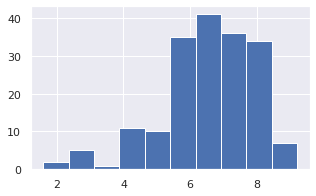

In [41]:
display(xbox_one.mean()) # взглянем на сами средние значения xbox_one
xbox_one.hist(figsize=(5, 3)) # также взглянем на гистограммах на распределение

6.451791530944625

<AxesSubplot:>

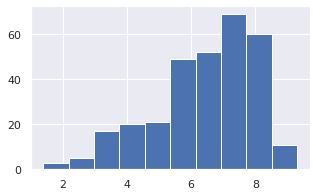

In [42]:
display(pc.mean()) # взглянем на сами средние значения рс
pc.hist(figsize=(5, 3)) # также взглянем на гистограммах на распределение

Действительно, они достаточно схожи.

**Учитывая необходимость сравнения средних значений между двумя независимыми выборками возможно применения критерия Манна-Уитни. Мне неизвестен иной непараметрический критерий для сравнения независимых групп при ненормальном распределении. В данном конкретном случае Т-критерий стьюдента не совсем применим, так как распределение по данным тестов Шапиро-Уилка отличное от нормального.**

In [ ]:
results = st.mannwhitneyu(
    xbox_one, pc) # критерий манна-уитни для независимых выборок (XOne и PC)

alpha = 0.05 # заданный уровень значимости (традиционно)
# если p-value окажется меньше него - отвергнем гипотезу

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

Так как в ходе анализа не получилось отвергнуть нулевую гипотезу (вероятность явления 84%), следует сделать вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC являются одинаковыми в актуальном периоде с 2011 по 2016 год.

*2. Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные*

Формулируем нулевую гипотезу (Н_0) и альтернативную (Н_1)


H_0: Пользовательские рейтинги (user_score) в жанре Action = Пользовательские рейтинги (user_score) в жанре Sports (нулевая гипотеза)

H_1: Пользовательские рейтинги (user_score) в жанре Action ≠ Пользовательские рейтинги (user_score) в жанре Sports (альтернативная гипотеза)

In [ ]:
action = data_relevant_period.loc[(data_relevant_period['genre'] == 'Action'), 'user_score'] # берем в актуальном периоде пользовательские рейтинги по Action
action = action.dropna() # пришлось убрать отсутствующие значения для данного анализа

sports = data_relevant_period.loc[(data_relevant_period['genre'] == 'Sports'), 'user_score'] # берем в актуальном периоде пользовательские рейтинги по Sports
sports = sports.dropna() # пришлось убрать отсутствующие значения для данного анализа

Проверим распределение в указанных выборках

In [ ]:
from scipy.stats import shapiro # 
# один из методов проверки распределения данных - тест Шапиро-Уилка
display(shapiro(data_relevant_period['user_score'].dropna())) # оценим распределение по всему массиву данных
display(shapiro(action)) # оценим распределение данных по action
display(shapiro(sports)) # оценим распределение данных по sports

Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. У нас есть достаточно доказательств, чтобы сказать, что данные выборок не имеют нормального распределения

In [ ]:
display(action.mean()) # взглянем на сами средние значения xbox_one
action.hist(figsize=(5, 3)) # также взглянем на гистограммах на распределение

In [ ]:
display(sports.mean()) # взглянем на сами средние значения рс
sports.hist(figsize=(5, 3)) # также взглянем на гистограммах на распределение

Впечатление, что все же средние отличаются (только по значениям). Посмотрим проверку гипотез

In [ ]:
results = st.mannwhitneyu(
    action, sports) # вызов метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (Action и Sports)

alpha = 0.05 # заданный уровень значимости (традиционно)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

Так как в ходе анализа мы отвергли нулевую гипотезу, следует сделать вывод о том, что средние пользовательские рейтинги жанров Action и Sports в актуальном периоде с 2011 по 2016 год разные.

### Общий вывод:

В ходе проведенного исследовательского анализа данных было выявлено, что в игровой индустрии (в частности на рынках Северной Америки, Европы и Японии) отмечен некоторый спад количества выпущенных игр после 2010 года, что, вероятно, может быть связано с предпочтениями пользователей в отношении мобильных устройств в качестве платформы для игры. Среди суммарных продаж с 1980 по 2016 годы лидирующие позиции заниют платформы PS2, X360, PS3, Wii, DS, PS. Одними из наиболее перспективных платформ в последние годы (с 2011 года) являются PS4 и Хone с учетом роста продаж игр на этих платформах по состоянию на 2015 год. Максимальный уровень продаж по платформам в период с 2011 по 2016 год отмечен на платформах PS3, X360, 3DS. Однако учитывая рост продаж у PS4 и наибольший средний уровень продаж на данный платформе, стоит рассматривать данную платформу как одну из наиболее перспективную в ближайшем будущем. Выявлено, что имеется связь между продажами игр на различных платформах и отзывами критиков. При этом отзывы пользователей практически не оказывают влияния на уровень продаж. Среди наиболее успешных жанров игр по продажам очевидно лидирует Action, при этом в последние годы также возрос интерес к RPG и шутерам.

В ходе анализа, также определены портреты среднестатистического игрока в различных мировых регионах. Так в Северной Америке пользователи обычно играют на X360 или PS3 в экшены и шутеры категории М по ESRB. В Европе: пользователь обычно играет на PS3 или PS4 в экшены и шутеры категории М по ESRB. А в Японии: пользователь обычно играет на Nintedo-3DS в RPG и экшены неизвестной возрастной категории. Исходя из полученных результатов, представляется что рейтинг "для взрослых" (М по ESRB) оказывает влияние на продажи: в частности в Северной Америке и Европе наибольшее количество продаж с этим рейтингом.

В ходе проверок ряда гипотез, также было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC не являются одинаковыми в актуальном периоде с 2011 по 2016 год и что средние пользовательские рейтинги жанров Action и Sports в актуальном периоде с 2011 по 2016 год разные.

Для предстоящего планирования бизнеса в сфере продаж игр я бы рекомендовал учитывать рейтинги критиков перед оптовой закупкой игр, рассматривать игры для PS4 и XOne в качестве приоритетных с учетом роста продаж по этим платформам. В случае если магазин будет открываться/работать в Европейской части, я бы рекомендовал преимущественно оптовую закупку экшенов и шутеров (с категорией М от ESRB) с учетом их популярности. 